In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#reading the dataset from a .csv file
print(" \n  \n \n Reading Data \n \n \n")
data = pd.read_csv(r'C:\Users\tirou\Desktop\srp project\data.csv')

#Reading the table and seeing what kind of data we're working with
print("\n \t The data frame has {0[0]} rows and {0[1]} columns. \n".format(data.shape))
data.info()

print("\n \t Printing first 5 rows from dataset")
print(data.head(5))
#Dropping the first column of the dataset because reading ids is useless in the programme.                                    
data.drop(data.columns[[-1, 0]], axis=1, inplace=True)    
#column names, vertucal axis, all changes to the saved 'in place', ie, data is replaced

print("\n \t Column 1: ID has been removed. ")
data.info()
diagnosis_all = list(data.shape)[0]
print(diagnosis_all)

diagnosis_categories = pd.Series(data['diagnosis'].value_counts())

print("\n \t The data has {} diagnosis, {} malignant and {} benign.".format(diagnosis_all, diagnosis_categories[1], diagnosis_categories[0]))


 
  
 
 Reading Data 
 
 


 	 The data frame has 569 rows and 32 columns. 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  tex


 
 
 Visualising data

 
 	 Heatmap

 
 	 	  Bening Diagnosis: Blue              Malignant Diagnosis: Red  


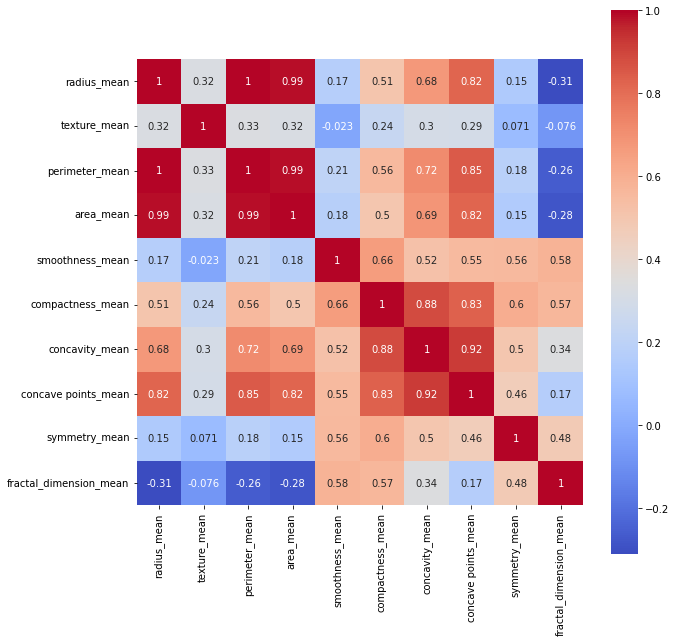

In [7]:
#visualizing data
print("\n \n \n Visualising data");
#Plotting Heatmap
print("\n \n \t Heatmap")
print("\n \n \t \t  Bening Diagnosis: Blue              Malignant Diagnosis: Red  ");
features_mean= list(data.columns[1:11])  #['radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean', 'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean']
plt.figure(figsize=(10,10))
sns.heatmap(data[features_mean].corr(), annot=True, square=True, cmap='coolwarm')       
plt.show()



 
 	 Histograms

 
 	 	  These histograms enable us to see how the diagnosis varies with each type of mean feature.  

 
 	 	  Bening Diagnosis: Blue              Malignant Diagnosis: Red  


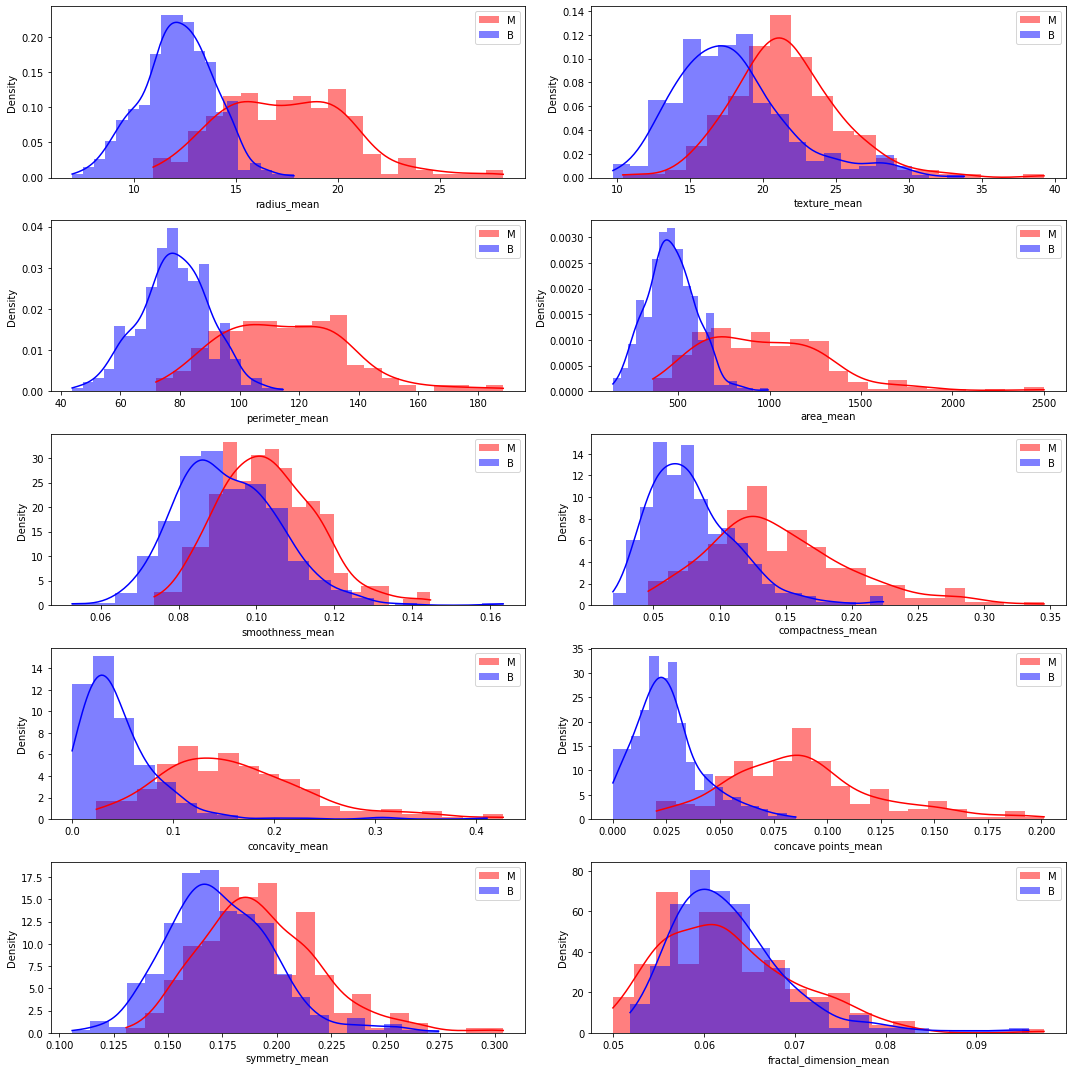

In [8]:

#visualising an unvariant set of observations through a histogram
print("\n \n \t Histograms")
print("\n \n \t \t  These histograms enable us to see how the diagnosis varies with each type of mean feature.  ")
print("\n \n \t \t  Bening Diagnosis: Blue              Malignant Diagnosis: Red  ");
bins = 20         
plt.figure(figsize=(15,15))
for i, feature in enumerate(features_mean):
    rows = int(len(features_mean)/2)
    
    plt.subplot(rows, 2, i+1)
    
    sns.histplot(data[data['diagnosis']=='M'][feature], bins=bins, color='red', label='M', kde=True, stat='density', linewidth=0)  
    sns.histplot(data[data['diagnosis']=='B'][feature], bins=bins, color='blue', label='B', kde=True, stat='density', linewidth=0)
    
    plt.legend(loc='upper right')

plt.tight_layout()
plt.show()



 
 	 Scatter Matrix

 
 	 	  The scatter matrix contains for each combination of the variable, the relation between them.  

 
 	 	  Here, we see the relationships between all the features that we're using to classify our data.   

 
 	 	  Bening Diagnosis: Blue              Malignant Diagnosis: Red  


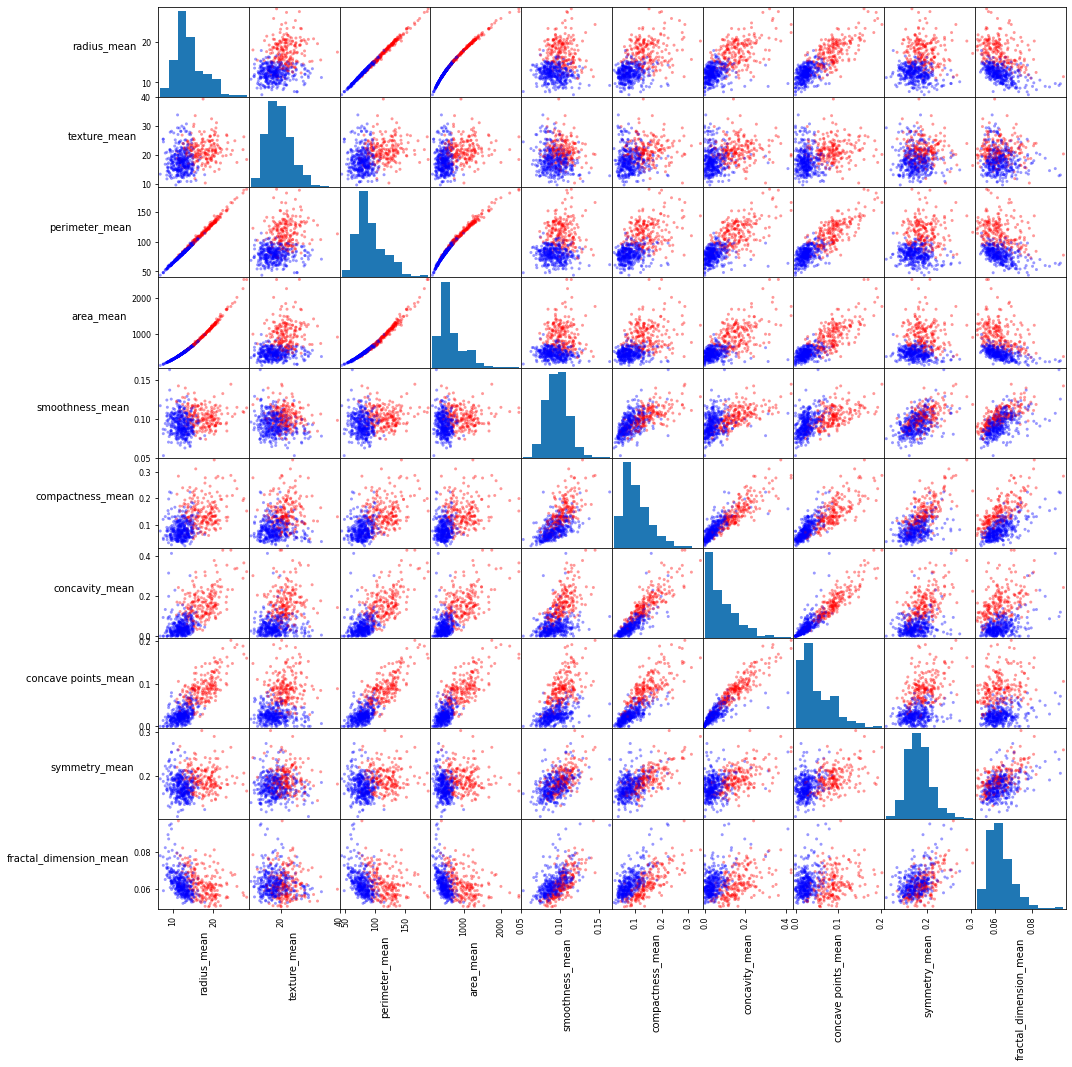

In [9]:
#plotting scatter matrix: 
print("\n \n \t Scatter Matrix")
print("\n \n \t \t  The scatter matrix contains for each combination of the variable, the relation between them.  ")
print("\n \n \t \t  Here, we see the relationships between all the features that we're using to classify our data.   ")
print("\n \n \t \t  Bening Diagnosis: Blue              Malignant Diagnosis: Red  ");
color_dic = {'M':'red', 'B':'blue'}
colors = data['diagnosis'].map(lambda x: color_dic.get(x))
sm = pd.plotting.scatter_matrix(data[features_mean], c=colors, alpha=0.4, figsize=((15,15)))
for ax in sm.flatten():
  ax.xaxis.label.set_rotation(90)
  ax.yaxis.label.set_rotation(0)
  ax.yaxis.label.set_ha('right')
plt.tight_layout();
plt.gcf().subplots_adjust(wspace=0, hspace=0)
plt.show()



In [10]:
#As we saw above, some of the features can have, most of the times, values that will fall in some range 
#depending on the diagnosis been malignant or benign. We will select those features to use in the next section.

features_selection = ['radius_mean', 'perimeter_mean', 'area_mean', 'concavity_mean', 'concave points_mean'];

#Machine Learning
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score

import time

#The algorithms will only process numerical values. We have transformed the categories M and B into values 1 and 0, respectively.

diag_map = {'M':1, 'B':0}
data['diagnosis'] = data['diagnosis'].map(diag_map)

X = data.loc[:,features_mean]
y = data.loc[:, 'diagnosis']
# to avoid overfitting, we use train_test_split to take in random data (20% of total data (test size=0.2))
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.6, random_state = 42)

accuracy_all = []
cvs_all = []



In [11]:
#we are using nine different classifiers, all with standard parameters. It will help us select the best prediction making model
#This is called dynamic classifier selection, a type of ensemble machine learning, which makes it perform batter than any single model in the pool 

#Classifier 1 : Stochastic Gradient Descent
from sklearn.linear_model import SGDClassifier

start = time.time()

clf = SGDClassifier()
clf.fit(X_train, y_train)
prediction = clf.predict(X_test)
scores = cross_val_score(clf, X, y, cv=5)

end = time.time()

accuracy_all.append(accuracy_score(prediction, y_test))
cvs_all.append(np.mean(scores))

print("SGD Classifier Accuracy: {0:.2%}".format(accuracy_score(prediction, y_test)))
print("Cross validation score: {0:.2%} (+/- {1:.2%})".format(np.mean(scores), np.std(scores)*2))
print("Execution time: {0:.5} seconds \n".format(end-start))


SGD Classifier Accuracy: 86.26%
Cross validation score: 73.80% (+/- 9.80%)
Execution time: 0.020943 seconds 



In [42]:
#3 Support Vector Machines classifiers
from sklearn.svm import SVC, NuSVC

start = time.time()

clf = SVC()
clf.fit(X_train, y_train)
prediction = clf.predict(X_test)
scores = cross_val_score(clf, X, y, cv=5)

end = time.time()

accuracy_all.append(accuracy_score(prediction, y_test))
cvs_all.append(np.mean(scores))

print("SVC Accuracy: {0:.2%}".format(accuracy_score(prediction, y_test)))
print("Cross validation score: {0:.2%} (+/- {1:.2%})".format(np.mean(scores), np.std(scores)*2))
print("Execution time: {0:.5} seconds \n".format(end-start))

start = time.time()

clf = NuSVC()
clf.fit(X_train, y_train)
prediciton = clf.predict(X_test)
scores = cross_val_score(clf, X, y, cv=5)

end = time.time()

accuracy_all.append(accuracy_score(prediction, y_test))
cvs_all.append(np.mean(scores))

print("NuSVC Accuracy: {0:.2%}".format(accuracy_score(prediction, y_test)))
print("Cross validation score: {0:.2%} (+/- {1:.2%})".format(np.mean(scores), np.std(scores)*2))
print("Execution time: {0:.5} seconds \n".format(end-start))


SVC Accuracy: 92.11%
Cross validation score: 88.58% (+/- 9.52%)
Execution time: 0.038896 seconds 

NuSVC Accuracy: 92.11%
Cross validation score: 85.24% (+/- 9.47%)
Execution time: 0.064826 seconds 



In [14]:
#Nearest Neighbors classifier
#The nearest neighbors classifier finds predefined number of training samples closest in distance to the new point, and predict the label from these.

from sklearn.neighbors import KNeighborsClassifier

start = time.time()

clf = KNeighborsClassifier()
clf.fit(X_train, y_train)
prediction = clf.predict(X_test)
scores = cross_val_score(clf, X, y, cv=5)

end = time.time()

accuracy_all.append(accuracy_score(prediction, y_test))
cvs_all.append(np.mean(scores))

print("Accuracy: {0:.2%}".format(accuracy_score(prediction, y_test)))
print("Cross validation score: {0:.2%} (+/- {1:.2%})".format(np.mean(scores), np.std(scores)*2))
print("Execution time: {0:.5} seconds \n".format(end-start))


Accuracy: 89.47%
Cross validation score: 88.58% (+/- 7.10%)
Execution time: 0.038895 seconds 



In [15]:
#Naive Bayes Classifier
#The Naive Bayes algorithm applies Bayes’ theorem with the assumption of independence between every pair of features.
from sklearn.naive_bayes import GaussianNB

start = time.time()

clf = GaussianNB()
clf.fit(X_train, y_train)
prediction = clf.predict(X_test)
scores = cross_val_score(clf, X, y, cv=5)

end = time.time()

accuracy_all.append(accuracy_score(prediction, y_test))
cvs_all.append(np.mean(scores))

print("Accuracy: {0:.2%}".format(accuracy_score(prediction, y_test)))
print("Cross validation score: {0:.2%} (+/- {1:.2%})".format(np.mean(scores), np.std(scores)*2))
print("Execution time: {0:.5} seconds \n".format(end-start))



Accuracy: 92.98%
Cross validation score: 91.39% (+/- 5.13%)
Execution time: 0.018948 seconds 



In [18]:
#3 Forest and tree methods
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.tree import DecisionTreeClassifier

start = time.time()

clf = RandomForestClassifier()
clf.fit(X_train, y_train)
prediction = clf.predict(X_test)
scores = cross_val_score(clf, X, y, cv=5)

end = time.time()

accuracy_all.append(accuracy_score(prediction, y_test))
cvs_all.append(np.mean(scores))

print("Random Forest Accuracy: {0:.2%}".format(accuracy_score(prediction, y_test)))
print("Cross validation score: {0:.2%} (+/- {1:.2%})".format(np.mean(scores), np.std(scores)*2))
print("Execution time: {0:.5} seconds \n".format(end-start))

start = time.time()

clf = ExtraTreesClassifier()
clf.fit(X_train, y_train)
prediction = clf.predict(X_test)
scores = cross_val_score(clf, X, y, cv=5)

end = time.time()

accuracy_all.append(accuracy_score(prediction, y_test))
cvs_all.append(np.mean(scores))

print("Extra Trees Accuracy: {0:.2%}".format(accuracy_score(prediction, y_test)))
print("Cross validation score: {0:.2%} (+/- {1:.2%})".format(np.mean(scores), np.std(scores)*2))
print("Execution time: {0:.5} seconds \n".format(end-start))

start = time.time()

clf = DecisionTreeClassifier()
clf.fit(X_train, y_train)
prediction = clf.predict(X_test)
scores = cross_val_score(clf, X, y, cv=5)

end = time.time()

accuracy_all.append(accuracy_score(prediction, y_test))
cvs_all.append(np.mean(scores))

print("Decision Tree Accuracy: {0:.2%}".format(accuracy_score(prediction, y_test)))
print("Cross validation score: {0:.2%} (+/- {1:.2%})".format(np.mean(scores), np.std(scores)*2))
print("Execution time: {0:.5} seconds \n".format(end-start))


Random Forest Accuracy: 92.98%
Cross validation score: 94.38% (+/- 6.13%)
Execution time: 0.65824 seconds 

Extra Trees Accuracy: 91.81%
Cross validation score: 94.20% (+/- 4.90%)
Execution time: 0.46424 seconds 

Decision Tree Accuracy: 91.23%
Cross validation score: 92.09% (+/- 2.46%)
Execution time: 0.020944 seconds 



In [19]:
#applying the filters we chose from our analysis
X = data.loc[:,features_selection]
y = data.loc[:, 'diagnosis']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

accuracy_selection = []
cvs_selection = []

In [20]:
#Stochastic Gradient Descent
from sklearn.linear_model import SGDClassifier

start = time.time()

clf = SGDClassifier()
clf.fit(X_train, y_train)
prediction = clf.predict(X_test)
scores = cross_val_score(clf, X, y, cv=5)

end = time.time()

accuracy_selection.append(accuracy_score(prediction, y_test))
cvs_selection.append(np.mean(scores))

print("SGD Classifier Accuracy: {0:.2%}".format(accuracy_score(prediction, y_test)))
print("Cross validation score: {0:.2%} (+/- {1:.2%})".format(np.mean(scores), np.std(scores)*2))
print("Execution time: %s seconds \n" % "{0:.5}".format(end-start))


SGD Classifier Accuracy: 90.35%
Cross validation score: 86.82% (+/- 6.35%)
Execution time: 0.023937 seconds 



In [41]:
#Support Vector Machines
from sklearn.svm import SVC, NuSVC, LinearSVC

start = time.time()

clf = SVC()
clf.fit(X_train, y_train)
prediction = clf.predict(X_test)
scores = cross_val_score(clf, X, y, cv=5)

end = time.time()

accuracy_selection.append(accuracy_score(prediction, y_test))
cvs_selection.append(np.mean(scores))

print("SVC Accuracy: {0:.2%}".format(accuracy_score(prediction, y_test)))
print("Cross validation score: {0:.2%} (+/- {1:.2%})".format(np.mean(scores), np.std(scores)*2))
print("Execution time: %s seconds \n" % "{0:.5}".format(end-start))

start = time.time()

clf = NuSVC()
clf.fit(X_train, y_train)
prediciton = clf.predict(X_test)
scores = cross_val_score(clf, X, y, cv=5)

end = time.time()

accuracy_selection.append(accuracy_score(prediction, y_test))
cvs_selection.append(np.mean(scores))

print("NuSVC Accuracy: {0:.2%}".format(accuracy_score(prediction, y_test)))
print("Cross validation score: {0:.2%} (+/- {1:.2%})".format(np.mean(scores), np.std(scores)*2))
print("Execution time: %s seconds \n" % "{0:.5}".format(end-start))

SVC Accuracy: 92.11%
Cross validation score: 88.58% (+/- 9.52%)
Execution time: 0.045885 seconds 

NuSVC Accuracy: 92.11%
Cross validation score: 85.24% (+/- 9.47%)
Execution time: 0.061831 seconds 



In [22]:
#Nearest Neighbors
from sklearn.neighbors import KNeighborsClassifier

start = time.time()

clf = KNeighborsClassifier()
clf.fit(X_train, y_train)
prediction = clf.predict(X_test)
scores = cross_val_score(clf, X, y, cv=5)

end = time.time()

accuracy_selection.append(accuracy_score(prediction, y_test))
cvs_selection.append(np.mean(scores))

print("Accuracy: {0:.2%}".format(accuracy_score(prediction, y_test)))
print("Cross validation score: {0:.2%} (+/- {1:.2%})".format(np.mean(scores), np.std(scores)*2))
print("Execution time: %s seconds \n" % "{0:.5}".format(end-start))


Accuracy: 92.11%
Cross validation score: 88.23% (+/- 7.06%)
Execution time: 0.034906 seconds 



In [23]:
#Naive Bayes
from sklearn.naive_bayes import GaussianNB

start = time.time()

clf = GaussianNB()
clf.fit(X_train, y_train)
prediction = clf.predict(X_test)
scores = cross_val_score(clf, X, y, cv=5)

end = time.time()

accuracy_selection.append(accuracy_score(prediction, y_test))
cvs_selection.append(np.mean(scores))

print("Accuracy: {0:.2%}".format(accuracy_score(prediction, y_test)))
print("Cross validation score: {0:.2%} (+/- {1:.2%})".format(np.mean(scores), np.std(scores)*2))
print("Execution time: %s seconds \n" % "{0:.5}".format(end-start))


Accuracy: 94.74%
Cross validation score: 90.87% (+/- 5.91%)
Execution time: 0.019946 seconds 



In [24]:
#Forest and tree methods
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.tree import DecisionTreeClassifier

start = time.time()

clf = RandomForestClassifier()
clf.fit(X_train, y_train)
prediction = clf.predict(X_test)
scores = cross_val_score(clf, X, y, cv=5)

end = time.time()

accuracy_selection.append(accuracy_score(prediction, y_test))
cvs_selection.append(np.mean(scores))

print("Random Forest Accuracy: {0:.2%}".format(accuracy_score(prediction, y_test)))
print("Cross validation score: {0:.2%} (+/- {1:.2%})".format(np.mean(scores), np.std(scores)*2))
print("Execution time: %s seconds \n" % "{0:.5}".format(end-start))

start = time.time()

clf = ExtraTreesClassifier()
clf.fit(X_train, y_train)
prediction = clf.predict(X_test)
scores = cross_val_score(clf, X, y, cv=5)

end = time.time()

accuracy_selection.append(accuracy_score(prediction, y_test))
cvs_selection.append(np.mean(scores))

print("Extra Trees Accuracy: {0:.2%}".format(accuracy_score(prediction, y_test)))
print("Cross validation score: {0:.2%} (+/- {1:.2%})".format(np.mean(scores), np.std(scores)*2))
print("Execution time: %s seconds \n" % "{0:.5}".format(end-start))

start = time.time()

clf = DecisionTreeClassifier()
clf.fit(X_train, y_train)
prediction = clf.predict(X_test)
scores = cross_val_score(clf, X, y, cv=5)

end = time.time()

accuracy_selection.append(accuracy_score(prediction, y_test))
cvs_selection.append(np.mean(scores))

print("Dedicion Tree Accuracy: {0:.2%}".format(accuracy_score(prediction, y_test)))
print("Cross validation score: {0:.2%} (+/- {1:.2%})".format(np.mean(scores), np.std(scores)*2))
print("Execution time: %s seconds \n" % "{0:.5}".format(end-start))


Random Forest Accuracy: 92.98%
Cross validation score: 92.45% (+/- 6.88%)
Execution time: 0.62633 seconds 

Extra Trees Accuracy: 93.86%
Cross validation score: 91.39% (+/- 4.87%)
Execution time: 0.45279 seconds 

Dedicion Tree Accuracy: 90.35%
Cross validation score: 89.80% (+/- 5.31%)
Execution time: 0.016955 seconds 




 
 
 	 Finding the best model for Prediction


Text(0.5, 1.0, 'Prediction accuracy of Classifiers ')

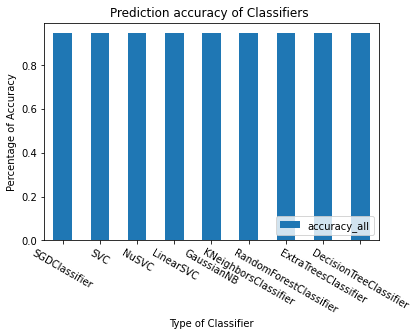

In [40]:
index=['SGDClassifier', 'SVC', 'NuSVC', 'LinearSVC','GaussianNB', 'KNeighborsClassifier', 'RandomForestClassifier', 'ExtraTreesClassifier','DecisionTreeClassifier']
print("\n \n \n \t Finding the best model for Prediction")
a={'accuracy_all': accuracy_all}
df1=pd.DataFrame(a,index)
df1[['accuracy_all']].plot(kind="bar").legend(loc='lower right', ncol=1)
plt.xticks(rotation=-30, horizontalalignment="center")
plt.xlabel('Type of Classifier')
plt.ylabel('Percentage of Accuracy')
plt.title("Prediction accuracy of Classifiers ")

In [31]:
#The grid search will be done only on the best models, which are Naive Bayes, Random Forest, Extra Trees and Decision Trees.
from sklearn.model_selection import GridSearchCV

X = data.loc[:,features_mean]
y = data.loc[:, 'diagnosis']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

accuracy_all = []
csv_all = []

#Naive Bayes
start = time.time()

parameters = {'priors':[[0.01, 0.99],[0.1, 0.9], [0.2, 0.8], [0.25, 0.75], [0.3, 0.7],[0.35, 0.65], [0.4, 0.6]]}

clf = GridSearchCV(GaussianNB(), parameters, scoring = 'average_precision', n_jobs=-1)
clf.fit(X_train, y_train)
prediction = clf.predict(X_test)
scores = cross_val_score(clf, X, y, cv=5)

end = time.time()

accuracy_all.append(accuracy_score(prediction, y_test))
cvs_all.append(np.mean(scores))

print("Accuracy: {0:.2%}".format(accuracy_score(prediction, y_test)))
print("Cross validation score: {0:.2%} (+/- {1:.2%})".format(np.mean(scores), np.std(scores)*2))
print("Execution time: {0:.5} seconds \n".format(end-start))

print("Best parameters: {0}".format(clf.best_params_))



Accuracy: 94.74%
Cross validation score: 95.44% (+/- 9.17%)
Execution time: 1.9697 seconds 

Best parameters: {'priors': [0.1, 0.9]}


In [32]:
#giving input
from sklearn.ensemble import RandomForestClassifier
import numpy as np
start = time.time()
clf = RandomForestClassifier()
clf.fit(X_train, y_train)
testa=np.array([[19.2,20.22,130.44,900,0.07892,0.1170,0.062,0.037,0.1999,0.0812]])
testb=np.array([[12.2,17.22,77.44,460,0.0456,0.0990,0.024,0.012,0.166,0.058]])
predictiona = clf.predict(testa)
predictionb = clf.predict(testb)
print(predictiona)
print(predictionb)
end = time.time()


[1]
[0]


C:\Users\tirou\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
C:\Users\tirou\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


In [35]:
#Forest and tree methods
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.tree import DecisionTreeClassifier

start = time.time()

rf = RandomForestClassifier()
rf.fit(X_train, y_train)
prediction = rf.predict(X_test)
scores = cross_val_score(rf, X, y, cv=5)

end = time.time()

import pickle
filename = 'trained_model.sav'
pickle.dump(rf,open(filename,'wb'))


In [36]:
loaded_model=pickle.load(open('trained_model.sav','rb'))